In [1]:
import pandas as pd

# Load manually downloaded data
rf_data = pd.read_csv('TB3MS.csv')

# Ensure correct column names
rf_data.columns = ['observation_date', 'TB3MS']
rf_data['date'] = pd.to_datetime(rf_data['observation_date'])  # Convert date to datetime format
rf_data['yyyymm'] = rf_data['date'].dt.strftime('%Y%m').astype(int)  # Convert date to yyyymm
rf_data['rf'] = rf_data['TB3MS']
rf_data = rf_data[['yyyymm', 'rf']]  # Keep only relevant columns

# Merge with stock data
#df = df.merge(rf_data, on='yyyymm', how='left')


In [2]:
# Load the data
df = pd.read_csv('crspm_and_predictors.csv')

#df['yyyymm'] = pd.to_datetime(df['yyyymm'])  # Convert date to datetime format
#df['yyyymm'] = df['yyyymm'].dt.strftime('%Y%m').astype(int)  # Convert date to yyyymm

In [3]:
import pandas as pd

# Ensure yyyymm is an integer in stock data
df['yyyymm'] = df['yyyymm'].astype(int)

# Ensure risk-free rate data is formatted correctly
rf_data = rf_data[['yyyymm', 'rf']].drop_duplicates()  # Drop duplicates if any
rf_data['yyyymm'] = rf_data['yyyymm'].astype(int)  # Ensure integer format

# Merge with stock data
df = df.merge(rf_data, on='yyyymm', how='left')

# Check for missing risk-free rates after merging
missing_rf = df[df['rf'].isna()]['yyyymm'].unique()
if len(missing_rf) > 0:
    print(f"Warning: Missing risk-free rates for these months: {missing_rf}")


In [4]:
df.to_csv('merged_data.csv', index=False)

In [5]:
df.head()

,permno,yyyymm,prc,ret,Price,Size,STreversal,MaxRet,High52,RealizedVol,...,MomOffSeason06YrPlus,grcapx,EntMult,Investment,PctTotAcc,EarnSupBig,EarningsSurprise,BetaTailRisk,CBOperProf,rf
0,10659,199102,-0.17188,-15.3846,1.760959,-8.844859,15.3846,0.000000,0.407414,-0.035295,...,NaN,0.799007,NaN,NaN,0.795044,-0.379424,-0.109776,NaN,-0.371791,5.94
1,10659,199103,-0.10938,-36.3636,2.212927,-8.392890,36.3636,0.000000,0.259268,-0.065733,...,NaN,0.799007,NaN,NaN,0.795044,-0.483346,-0.109776,NaN,-0.371791,5.91
2,10659,199104,-0.21875,100.0000,1.519826,-9.085992,-100.0000,-0.571429,0.518512,-0.127870,...,NaN,0.802281,NaN,-0.043613,0.439730,-0.470160,-0.050594,NaN,-0.138481,5.65
3,10659,199105,-0.21875,0.0000,1.519826,-9.085992,0.0000,-0.142857,0.518512,-0.045962,...,NaN,0.802281,NaN,-0.046697,0.439730,-0.498256,-0.050594,NaN,-0.138481,5.46
4,10659,199106,-0.20313,-7.1429,1.593909,-9.011908,7.1429,0.000000,0.481488,-0.015972,...,NaN,0.802281,NaN,-0.050251,0.439730,-0.116901,-0.050594,NaN,-0.138481,5.57


In [7]:

data = df.copy()

# Make sure the data is still ordered by permno and yyyymm, and apply shift per permno group
data['ret_fwd'] = data.groupby('permno')['ret'].shift(-1)

# Drop rows with NaN values in the ret_fwd column
data = data.dropna(subset=['ret_fwd'])

# Then calculate the excess return
data['excess_ret'] = data['ret_fwd'] - data['rf']


data.head()

,permno,yyyymm,prc,ret,Price,Size,STreversal,MaxRet,High52,RealizedVol,...,EntMult,Investment,PctTotAcc,EarnSupBig,EarningsSurprise,BetaTailRisk,CBOperProf,rf,ret_fwd,excess_ret
0,10659,199102,-0.17188,-15.3846,1.760959,-8.844859,15.3846,0.000000,0.407414,-0.035295,...,NaN,NaN,0.795044,-0.379424,-0.109776,NaN,-0.371791,5.94,-36.3636,-42.3036
1,10659,199103,-0.10938,-36.3636,2.212927,-8.392890,36.3636,0.000000,0.259268,-0.065733,...,NaN,NaN,0.795044,-0.483346,-0.109776,NaN,-0.371791,5.91,100.0000,94.0900
2,10659,199104,-0.21875,100.0000,1.519826,-9.085992,-100.0000,-0.571429,0.518512,-0.127870,...,NaN,-0.043613,0.439730,-0.470160,-0.050594,NaN,-0.138481,5.65,0.0000,-5.6500
3,10659,199105,-0.21875,0.0000,1.519826,-9.085992,0.0000,-0.142857,0.518512,-0.045962,...,NaN,-0.046697,0.439730,-0.498256,-0.050594,NaN,-0.138481,5.46,-7.1429,-12.6029
4,10659,199106,-0.20313,-7.1429,1.593909,-9.011908,7.1429,0.000000,0.481488,-0.015972,...,NaN,-0.050251,0.439730,-0.116901,-0.050594,NaN,-0.138481,5.57,0.0000,-5.5700


In [8]:
# Save processed data
data.to_csv('data_with_excess_return.csv', index=False)


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Replace infinity values with NaN
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Replace NaN values with 0
data.fillna(0, inplace=True)

# Apply MinMaxScaler with feature_range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Save the preprocessed data if needed
scaled_data.to_csv('preprocessed2_data.csv', index=False)

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [83]:
#First 500 samples
subset_data = scaled_data.iloc[:50000]

In [84]:
# 1. Prepare the features (X) and target variable (y)
X = subset_data.drop(columns=['ret_fwd', 'yyyymm', 'permno', 'excess_ret'])  # Drop target, date, and stock identifier
y = subset_data['excess_ret']  # Use excess return as the target variable

In [85]:
# 2. Chronologically split the data into training and testing (since the data is sorted by permno and yyyymm)

# Initialize a list to hold training and testing data
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

# Loop through each stock group (permno) to apply chronological split
for permno, group in subset_data.groupby('permno'):
    # Ensure the data is sorted by date (yyyymm) within each stock group
    group = group.sort_values('yyyymm')
    
    # Split the data chronologically for each group
    train_size = int(len(group) * 0.8)  # 80% for training, 20% for testing
    train_data = group[:train_size]
    test_data = group[train_size:]

    # Separate features (X) and target (y) for training and testing
    X_train = train_data.drop(columns=['ret_fwd', 'yyyymm', 'permno', 'excess_ret'])
    y_train = train_data['excess_ret']
    X_test = test_data.drop(columns=['ret_fwd', 'yyyymm', 'permno', 'excess_ret'])
    y_test = test_data['excess_ret']

    # Append to the lists
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Concatenate all groups' data
X_train = pd.concat(X_train_list)
X_test = pd.concat(X_test_list)
y_train = pd.concat(y_train_list)
y_test = pd.concat(y_test_list)

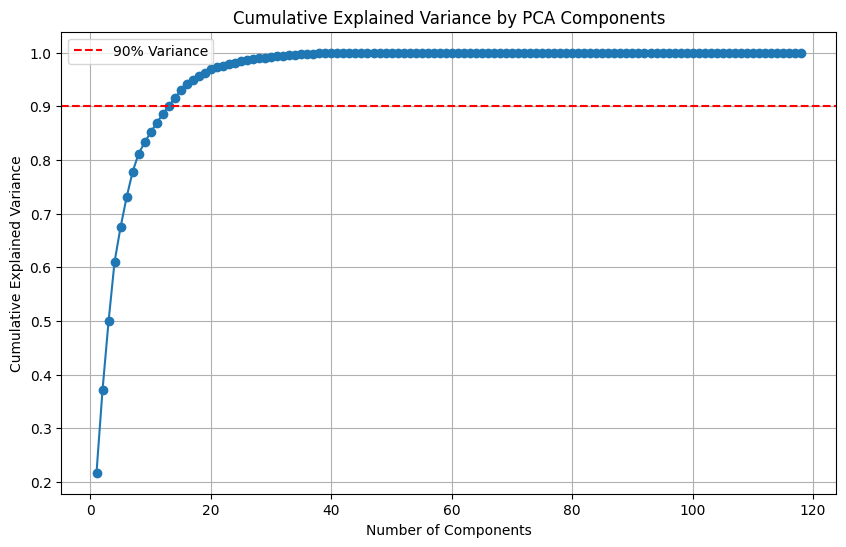

Optimal number of components: 13


In [86]:
# 3. Apply PCA to the training data and choose optimal number of components based on explained variance
pca = PCA().fit(X_train)

# Plot the cumulative explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

# Choose the number of components that explain at least 90% of the variance
optimal_components = (cumulative_variance >= 0.90).argmax() + 1
print(f"Optimal number of components: {optimal_components}")

In [87]:
# 4. Apply PCA with the optimal number of components
pcr = make_pipeline(PCA(n_components=27), LinearRegression())

# 5. Fit the model with the training data
pcr.fit(X_train, y_train)

# 6. Make predictions on the test data
y_pred = pcr.predict(X_test)

# 7. Evaluate the model (Mean Squared Error and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 9.658905592650034e-05
R-squared: 0.010956014161681682


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


# Model 1: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate performance
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regressor Performance:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")

# Model 2: XGBoost Regressor
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

# Predictions
xg_predictions = xg_model.predict(X_test)

# Evaluate performance
xg_mse = mean_squared_error(y_test, xg_predictions)
xg_r2 = r2_score(y_test, xg_predictions)

print("\nXGBoost Regressor Performance:")
print(f"Mean Squared Error: {xg_mse}")
print(f"R-squared: {xg_r2}")

Random Forest Regressor Performance:
Mean Squared Error: 0.0001259065605301432
R-squared: -0.2892467503221643

XGBoost Regressor Performance:
Mean Squared Error: 0.0001419306519869773
R-squared: -0.45332881046741424


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Assuming df is already loaded with your data

# 1. Prepare the features (X) and target variable (y)
X = df.drop(columns=['fwd_ret', 'yyyymm', 'permno', 'excess_ret'])  # Drop target, date, and stock identifier
y = df['excess_ret']  # Use excess return as the target variable

# 2. Chronologically split the data into training and testing (since the data is sorted by permno and yyyymm)
train_size = int(0.8 * len(df))  # 80% for training, 20% for testing

# Split the data based on time
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# 3. Apply PCA to the training data and choose optimal number of components based on explained variance
pca = PCA().fit(X_train)

# Plot the cumulative explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

# Choose the number of components that explain at least 90% of the variance
optimal_components = (cumulative_variance >= 0.90).argmax() + 1
print(f"Optimal number of components: {optimal_components}")

# 4. Apply PCA with the optimal number of components
pcr = make_pipeline(PCA(n_components=optimal_components), LinearRegression())

# 5. Fit the model with the training data
pcr.fit(X_train, y_train)

# 6. Make predictions on the test data
y_pred = pcr.predict(X_test)

# 7. Evaluate the model (Mean Squared Error and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
